In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization , Dropout , Flatten , Dense , Conv2D , MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import cv2

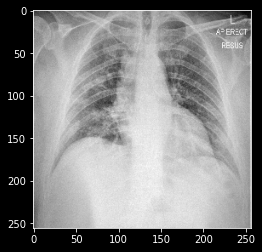

This is a lung scan from the covid directory.


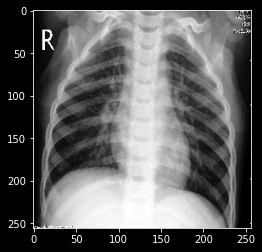

This is a lung scan from the normal_pneumonia directory.


In [2]:
# The data consists of images of lung scans of patients with COVID-19 and patients without COVID-19.
#Let us look at our data
Dirpath = "data"
lungscans = ["covid", "normal_pneumonia"]

for lungscan in lungscans :
    #specifying the path 
    path = Dirpath+'/train/'+ lungscan
    
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) 
        #Plotting the image to show the picture
        plt.imshow(img_array, cmap = 'gray')
        plt.show()
        print("This is a lung scan from the " + lungscan + " directory.")
        break


In [3]:
# Let us see the class distribution of our data
print("The class distribution of our training data is as follows:")
print(len(os.listdir("data/train/covid")), "COVID-19 lung scans")
print(len(os.listdir("data/train/normal_pneumonia")), "Normal or Pneumonia lung scans")
# define a few parameters for the training
batch_size = 24
epochs = 20
learning_rate = 0.001

# data augmentation
data_generator = ImageDataGenerator(rescale=1.0/255, rotation_range=20 , horizontal_flip=True, vertical_flip = True , fill_mode='nearest' , validation_split=0.3)
training_iterator = data_generator.flow_from_directory("data/train",  class_mode = 'categorical', color_mode = 'grayscale', batch_size = batch_size , shuffle = 'True')
validation_iterator = data_generator.flow_from_directory("data/train", class_mode = 'categorical', color_mode = 'grayscale', batch_size = batch_size , shuffle = 'True')


The class distribution of our training data is as follows:
111 COVID-19 lung scans
140 Normal or Pneumonia lung scans
Found 251 images belonging to 2 classes.
Found 251 images belonging to 2 classes.


In [4]:
# Let us create the model
model = Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3) , strides = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2) , strides = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 125, 125, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 125, 125, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 123, 123, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 238144)            0

In [5]:
model.compile(optimizer= Adam(learning_rate= learning_rate), loss= BinaryCrossentropy() , metrics = "accuracy")
history = model.fit(training_iterator,steps_per_epoch=training_iterator.samples/batch_size, epochs=epochs,validation_data=validation_iterator,validation_steps=validation_iterator.samples/batch_size)

Epoch 1/20
10/10 [==============================] - 6s 296ms/step - loss: 1.4624 - accuracy: 0.5697 - val_loss: 0.6918 - val_accuracy: 0.4422
Epoch 2/20
10/10 [==============================] - 3s 253ms/step - loss: 0.6138 - accuracy: 0.6614 - val_loss: 0.5898 - val_accuracy: 0.8167
Epoch 3/20
10/10 [==============================] - 3s 263ms/step - loss: 0.4254 - accuracy: 0.8287 - val_loss: 0.3679 - val_accuracy: 0.8685
Epoch 4/20
10/10 [==============================] - 3s 260ms/step - loss: 0.3542 - accuracy: 0.8526 - val_loss: 0.3938 - val_accuracy: 0.8805
Epoch 5/20
10/10 [==============================] - 3s 262ms/step - loss: 0.2956 - accuracy: 0.8964 - val_loss: 0.3540 - val_accuracy: 0.8247
Epoch 6/20
10/10 [==============================] - 3s 277ms/step - loss: 0.3215 - accuracy: 0.8526 - val_loss: 0.3960 - val_accuracy: 0.8207
Epoch 7/20
10/10 [==============================] - 3s 281ms/step - loss: 0.2773 - accuracy: 0.8845 - val_loss: 0.2905 - val_accuracy: 0.9124
Epoch 

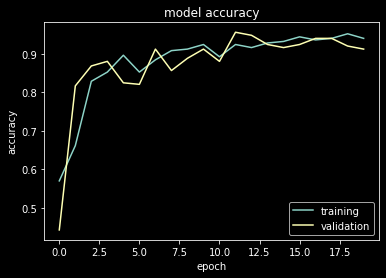

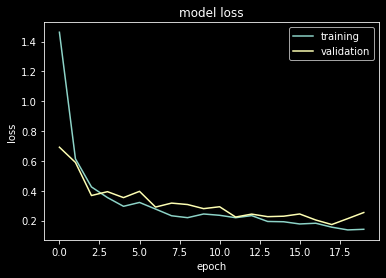

In [6]:
# plot a graph of accuracy per epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# plot a graph of loss per epoch 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'] , loc = 'upper right')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [7]:
# test the model on test data
test_batch_size= 1
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory("data/test",color_mode="grayscale",class_mode='categorical',shuffle= False, batch_size=test_batch_size)

filenames = test_generator.filenames
num_samples = len(filenames)
predict = model.predict(test_generator,steps = np.ceil(num_samples/test_batch_size))
predicted_class_indices = np.argmax(predict,axis=1)
labels = test_generator.classes
# calculate accuracy of the model
print("Accuracy of the model is: ",(np.sum(predicted_class_indices == labels)/num_samples)*100)


Found 63 images belonging to 2 classes.
Accuracy of the model is:  90.47619047619048
